In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import requests

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
klse = yf.Ticker("^KLSE")

In [3]:
klse.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 1425.18,
 'open': 1426.48,
 'dayLow': 1422.92,
 'dayHigh': 1429.92,
 'regularMarketPreviousClose': 1425.18,
 'regularMarketOpen': 1426.48,
 'regularMarketDayLow': 1422.92,
 'regularMarketDayHigh': 1429.92,
 'volume': 0,
 'regularMarketVolume': 0,
 'averageVolume': 114305272,
 'averageVolume10days': 100810730,
 'averageDailyVolume10Day': 100810730,
 'bid': 0.0,
 'ask': 0.0,
 'bidSize': 0,
 'askSize': 0,
 'fiftyTwoWeekLow': 1372.57,
 'fiftyTwoWeekHigh': 1570.1,
 'fiftyDayAverage': 1426.261,
 'twoHundredDayAverage': 1456.6816,
 'currency': 'MYR',
 'exchange': 'KLS',
 'quoteType': 'INDEX',
 'symbol': '^KLSE',
 'underlyingSymbol': '^KLSE',
 'shortName': 'FTSE Bursa Malaysia KLCI',
 'longName': 'FTSE Bursa Malaysia KLCI',
 'firstTradeDateEpochUtc': 754880400,
 'timeZoneFullName': 'Asia/Kuala_Lumpur',
 'timeZoneShortName': 'MYT',
 'uuid': '9626522a-4515-37fa-a748-ccdf3984662a',
 'messageBoardId': 'finmb_INDEXKLSE',
 'gmtOffSetMilliseconds':

In [4]:
# hist = klse.history(period="10y")

In [5]:
# hist.to_csv("klse.csv")

In [6]:
df = pd.read_csv("klse.csv")

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.set_index("Date", inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2448 entries, 2013-04-22 00:00:00+08:00 to 2023-04-20 00:00:00+08:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2448 non-null   float64
 1   High          2448 non-null   float64
 2   Low           2448 non-null   float64
 3   Close         2448 non-null   float64
 4   Volume        2448 non-null   int64  
 5   Dividends     2448 non-null   float64
 6   Stock Splits  2448 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 153.0 KB


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2448.000000,2448.000000,2448.000000,2448.000000,2.448000e+03,2448.0,2448.0
mean,1664.532824,1670.346463,1658.083721,1664.548096,1.422692e+08,0.0,0.0
std,129.334840,128.566692,130.246822,129.363727,6.730215e+07,0.0,0.0
min,1217.280029,1242.819946,1207.800049,1219.719971,0.000000e+00,0.0,0.0
25%,1578.692474,1585.170044,1569.137451,1577.079987,1.034872e+08,0.0,0.0
50%,1669.549988,1674.594971,1663.820007,1669.474976,1.278586e+08,0.0,0.0
75%,1773.545013,1777.104980,1768.187531,1772.684998,1.638100e+08,0.0,0.0
max,1895.550049,1896.229980,1891.660034,1895.180054,8.091767e+08,0.0,0.0


In [11]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-14 00:00:00+08:00,1434.839966,1438.280029,1431.810059,1435.130005,72150500,0.0,0.0
2023-04-17 00:00:00+08:00,1434.790039,1436.040039,1429.430054,1434.900024,87631200,0.0,0.0
2023-04-18 00:00:00+08:00,1435.469971,1435.469971,1429.589966,1432.359985,76820400,0.0,0.0
2023-04-19 00:00:00+08:00,1431.569946,1431.569946,1423.050049,1425.069946,97047400,0.0,0.0
2023-04-20 00:00:00+08:00,1428.640015,1428.640015,1418.819946,1422.109985,0,0.0,0.0


In [12]:
df.drop("2023-04-20", axis=0, inplace=True)

In [13]:
df.drop("Dividends", axis=1, inplace=True)
df.drop("Stock Splits", axis=1, inplace=True)

In [14]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-13 00:00:00+08:00,1433.869995,1435.010010,1430.890015,1434.219971,99529900
2023-04-14 00:00:00+08:00,1434.839966,1438.280029,1431.810059,1435.130005,72150500
2023-04-17 00:00:00+08:00,1434.790039,1436.040039,1429.430054,1434.900024,87631200
2023-04-18 00:00:00+08:00,1435.469971,1435.469971,1429.589966,1432.359985,76820400
2023-04-19 00:00:00+08:00,1431.569946,1431.569946,1423.050049,1425.069946,97047400


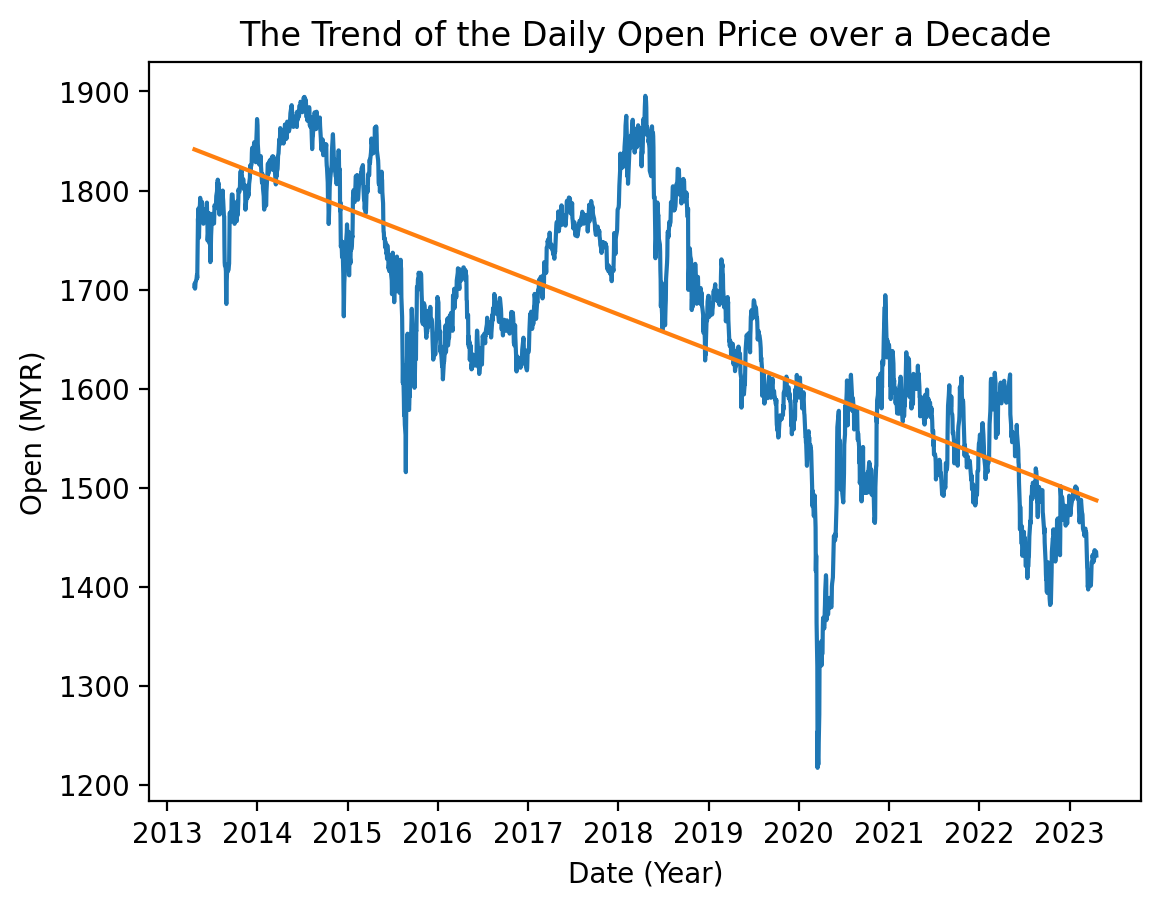

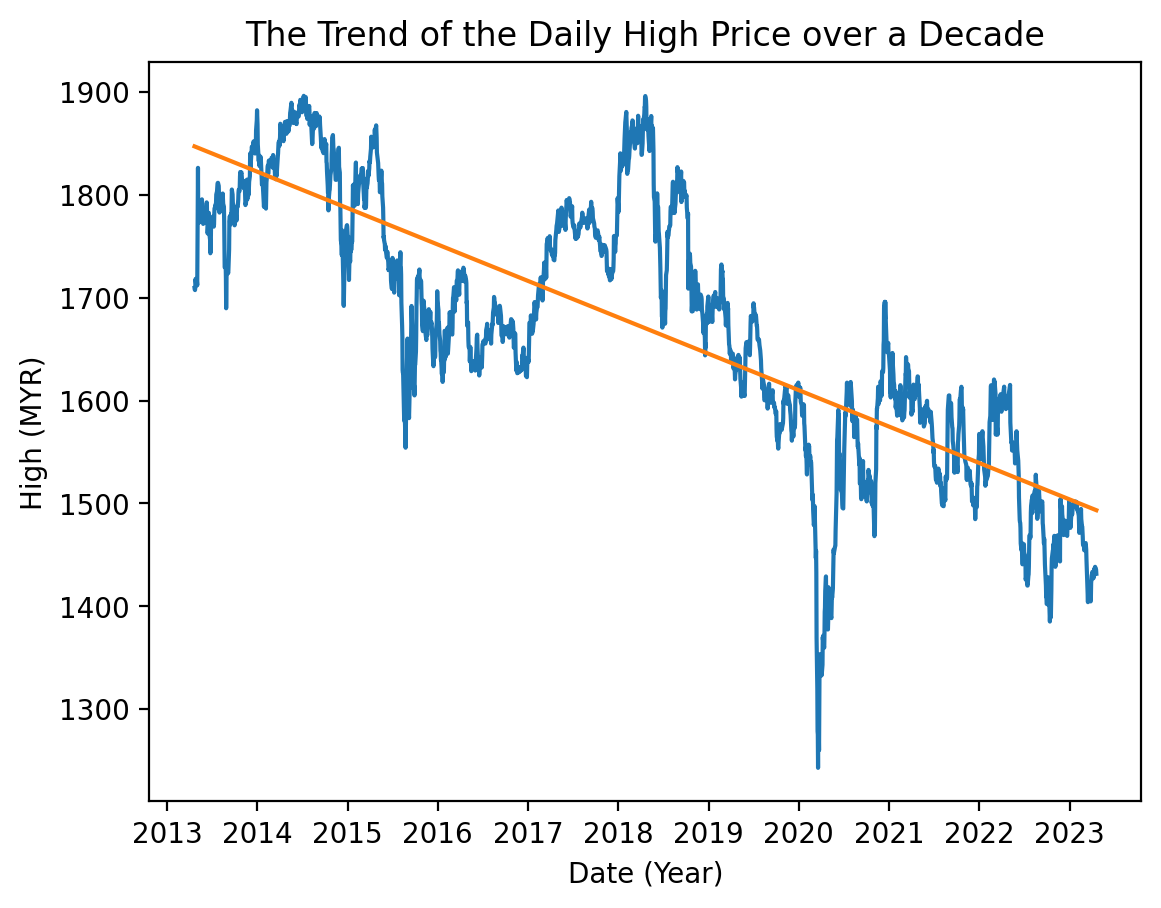

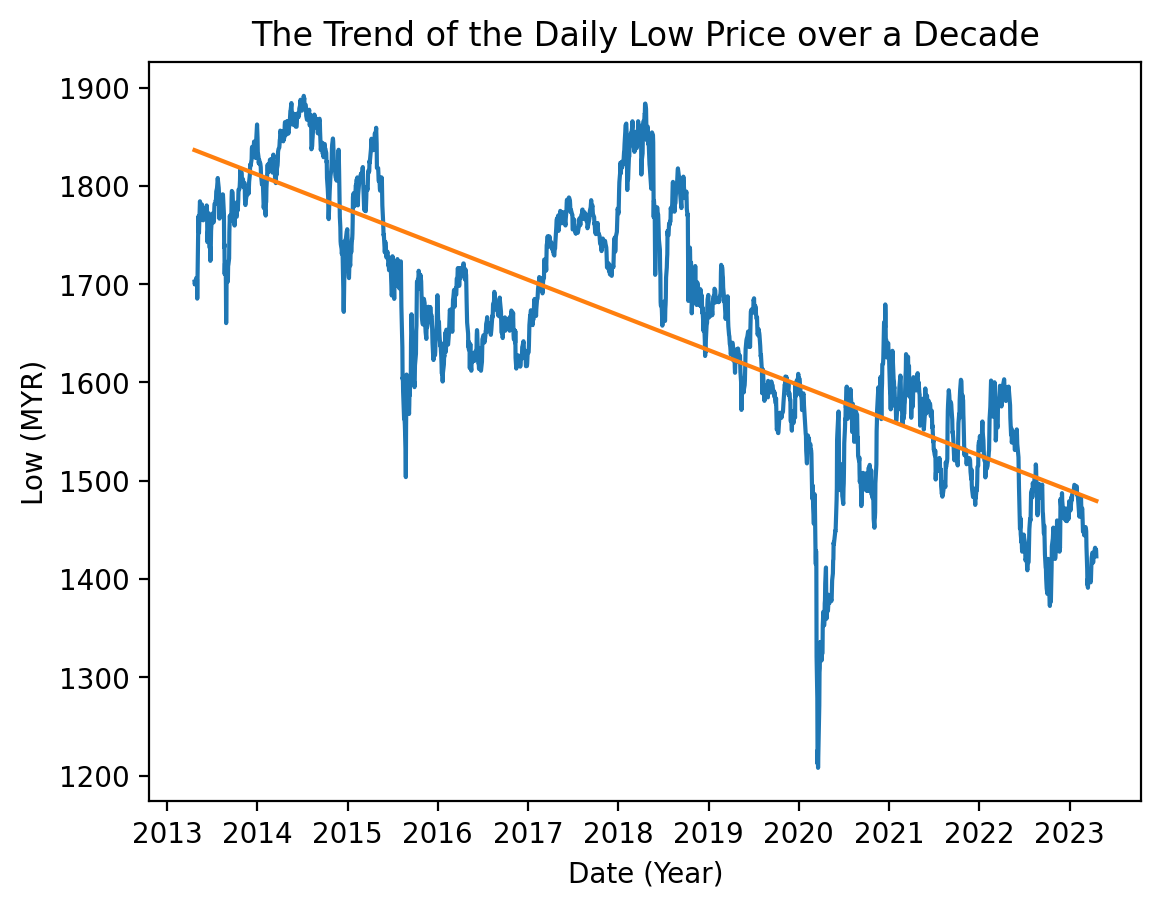

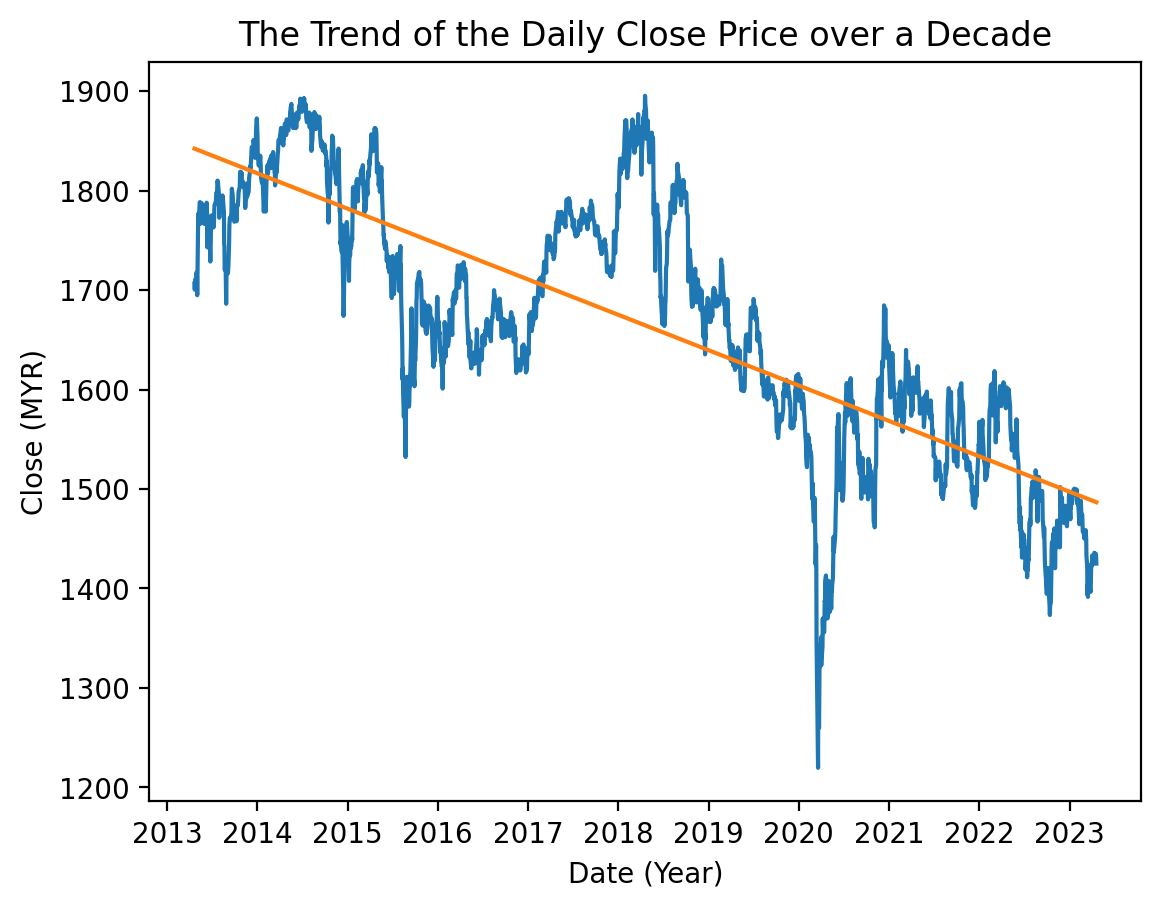

In [15]:
for x in ("Open", "High", "Low", "Close"):
    ts = df.index.map(lambda x: x.timestamp())
    ts = ts.to_numpy().reshape(-1, 1)

    model = LinearRegression()
    model.fit(ts, df[x])

    y_pred = model.predict(ts)

    plt.plot(df.index, df[x])
    plt.plot(df.index, y_pred)
    
    plt.title("The Trend of the Daily %s Price over a Decade" % x)
    plt.xlabel("Date (Year)")
    plt.ylabel("%s (MYR)" % x)

    plt.show()

In [16]:
(df["High"] - df["Open"]).describe()

count    2447.000000
mean        5.816015
std         6.564415
min         0.000000
25%         1.229980
50%         3.979980
75%         8.279968
max        84.010010
dtype: float64

In [17]:
(df["High"] - df["Close"]).describe()

count    2447.000000
mean        5.798067
std         6.490110
min         0.000000
25%         1.294983
50%         3.949951
75%         8.179932
max        74.199951
dtype: float64

In [18]:
(df["Open"] - df["Low"]).describe()

count    2447.000000
mean        6.447725
std         6.751929
min         0.000000
25%         1.619995
50%         4.639893
75%         8.849976
max        57.610107
dtype: float64

In [19]:
(df["Close"] - df["Low"]).describe()

count    2447.000000
mean        6.465673
std         6.460882
min         0.000000
25%         2.150024
50%         4.859985
75%         8.859985
max        82.739990
dtype: float64

In [20]:
(df["Close"] - df["Open"]).describe()

count    2447.000000
mean        0.017947
std         9.812792
min       -49.220093
25%        -5.175049
50%         0.109985
75%         5.325012
max        82.739990
dtype: float64

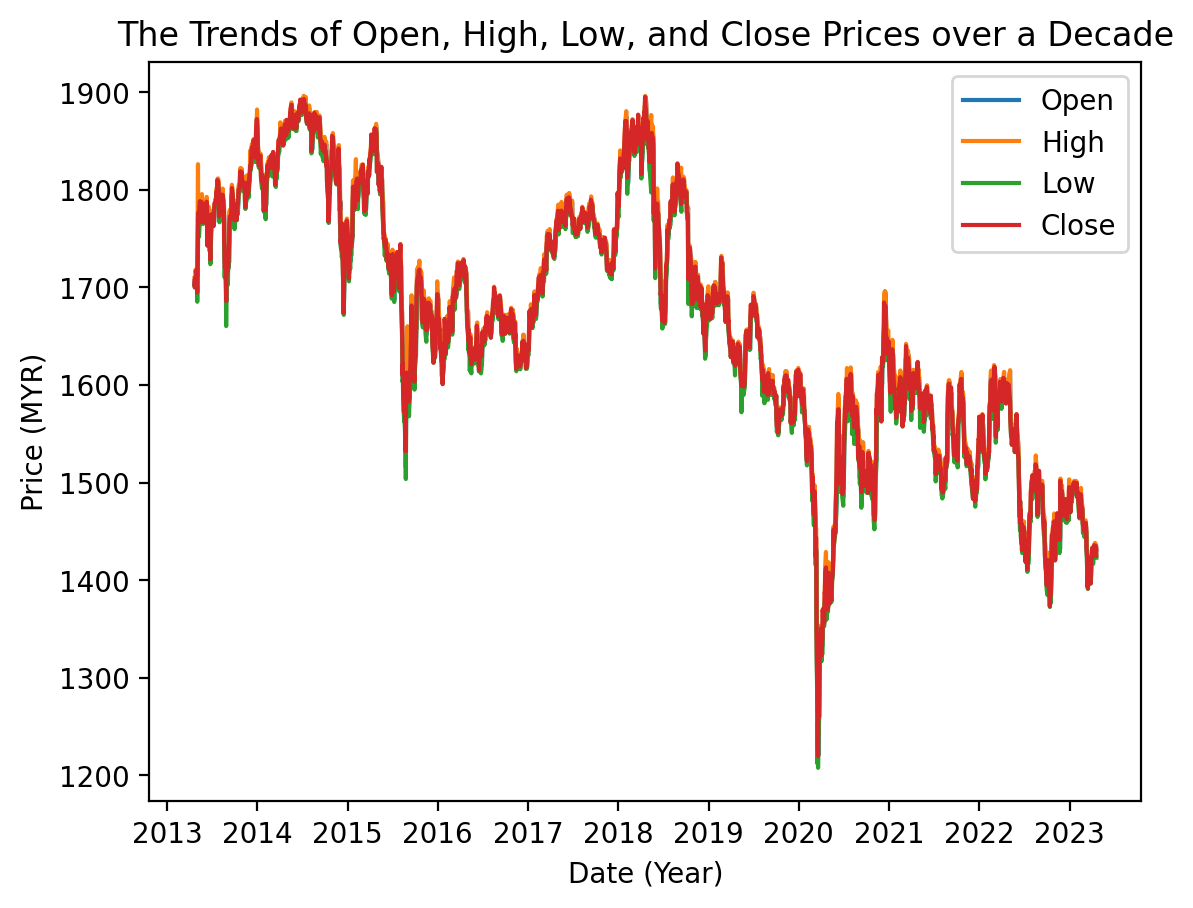

In [21]:
plt.plot(df.index, df[["Open", "High", "Low", "Close"]])

plt.title("The Trends of Open, High, Low, and Close Prices over a Decade")
plt.xlabel("Date (Year)")
plt.ylabel("Price (MYR)")
plt.legend(["Open","High","Low","Close"])
plt.show()

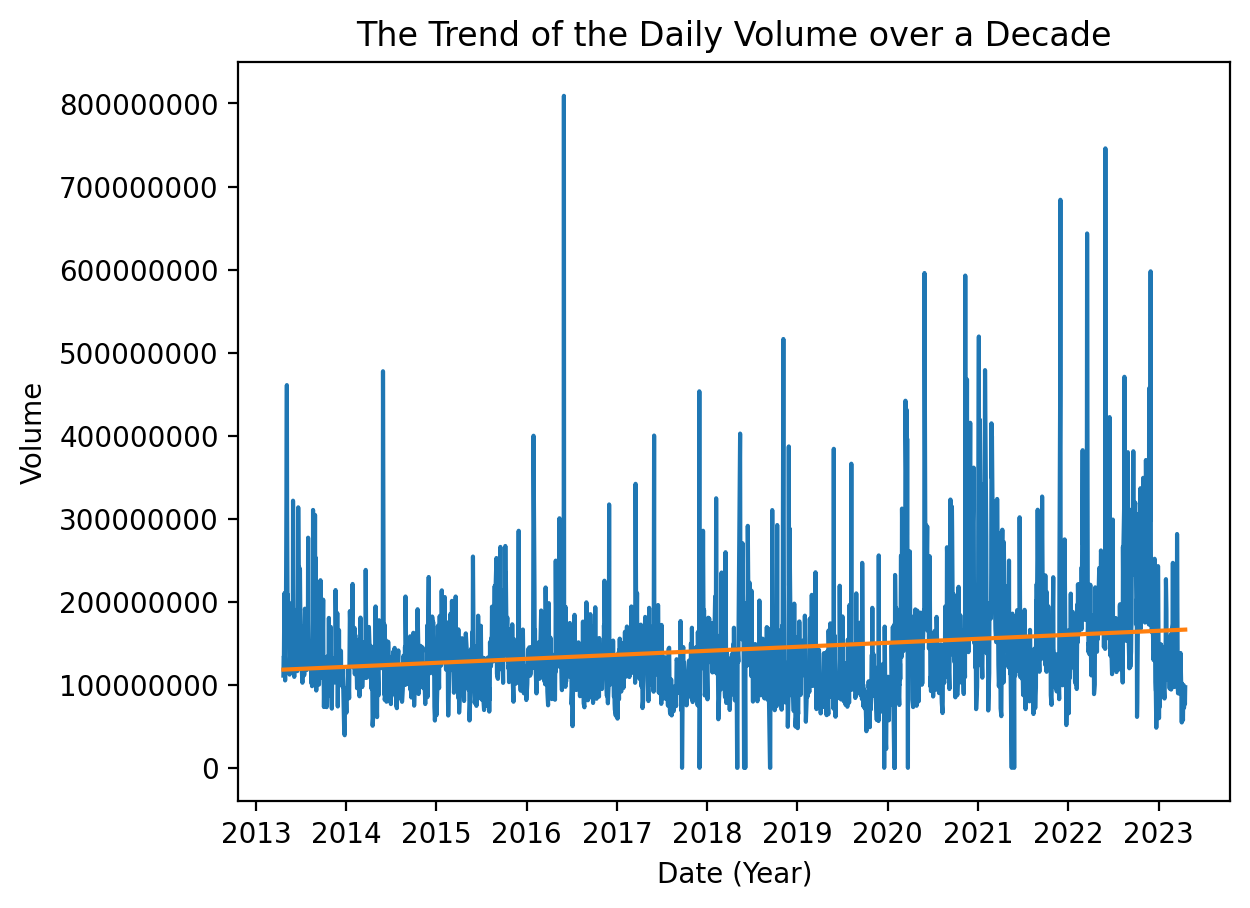

In [22]:
ts = df.index.map(lambda x: x.timestamp())
ts = ts.to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(ts, df["Volume"])

y_pred = model.predict(ts)

plt.plot(df.index, df["Volume"])
plt.plot(df.index, y_pred)

plt.title("The Trend of the Daily Volume over a Decade")
plt.xlabel("Date (Year)")
plt.ylabel("Volume")

plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.show()

In [23]:
# mpf.plot(
#     df.loc["2022-10-01":"2023",:],
#     figsize=(12.8, 9.6),
#     volume=True,
#     style='yahoo',
#     type="candle"
# )

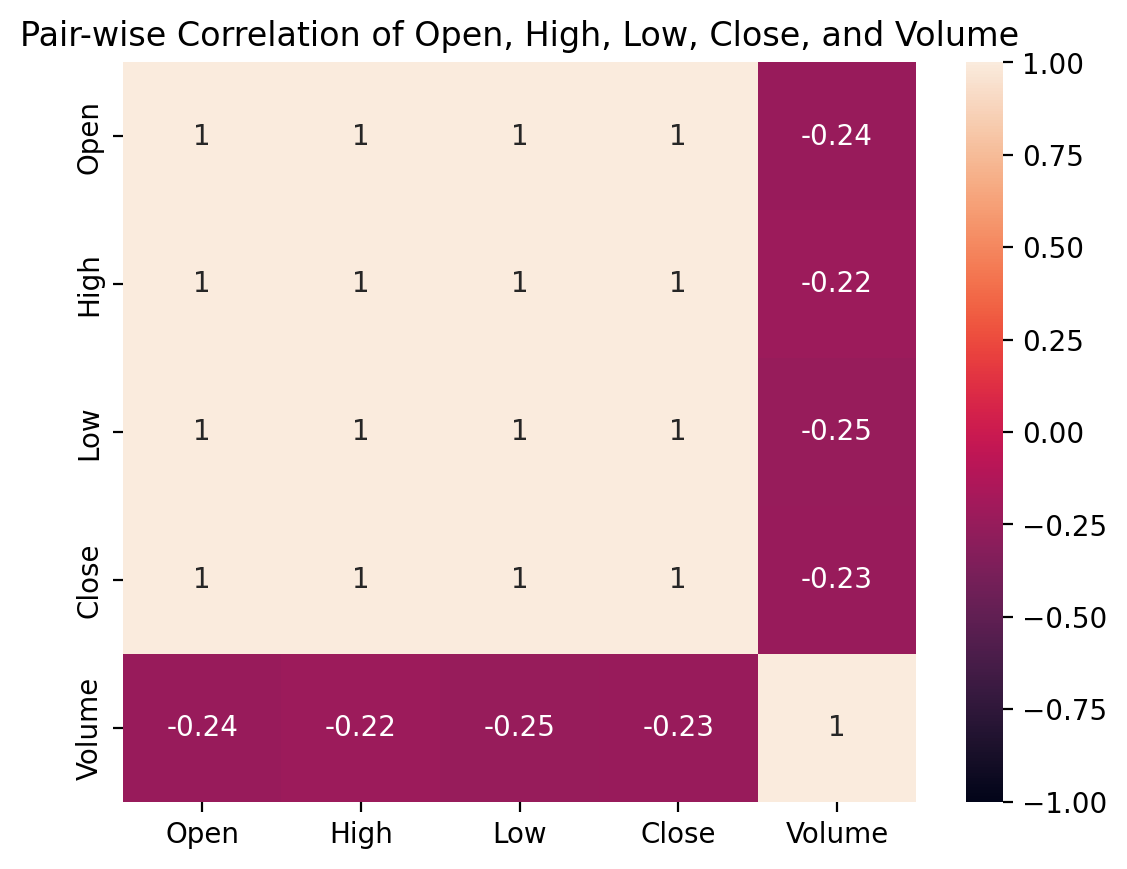

In [24]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

plt.title("Pair-wise Correlation of Open, High, Low, Close, and Volume")

plt.show()

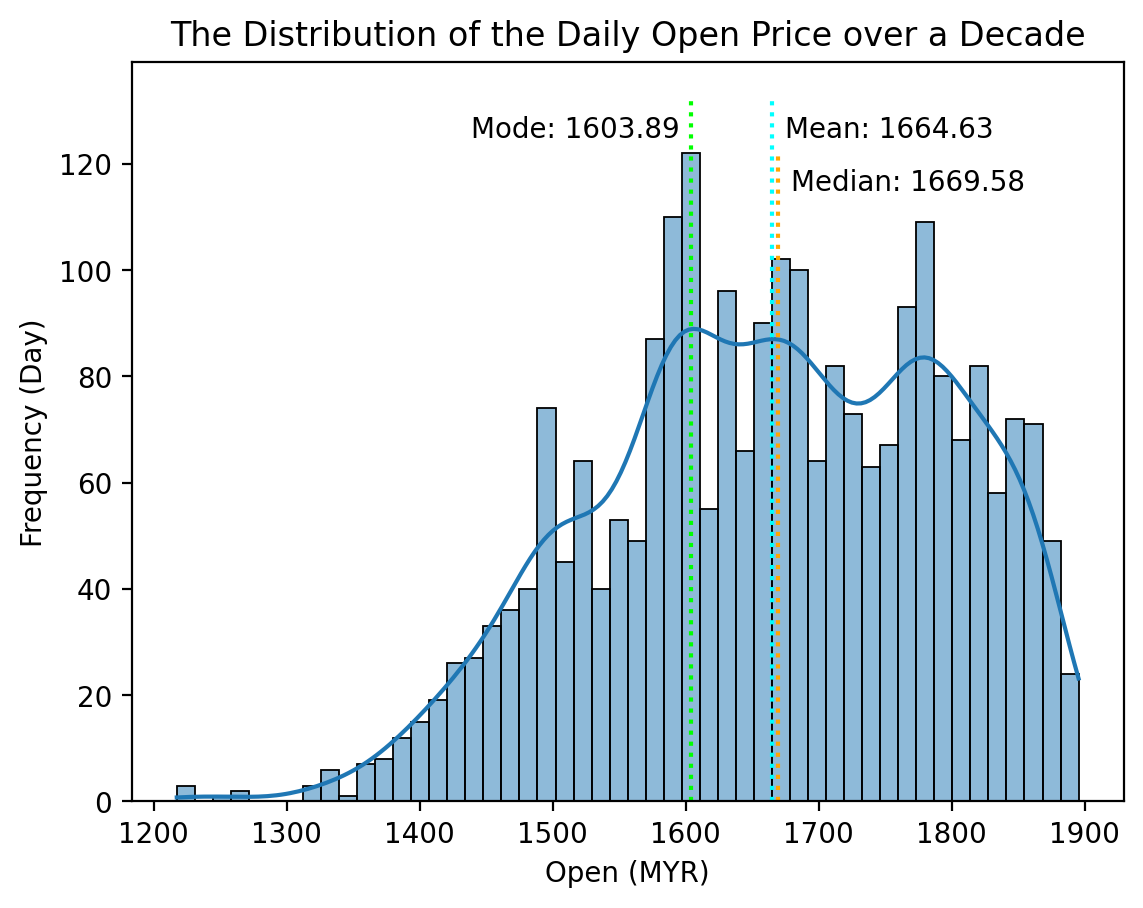

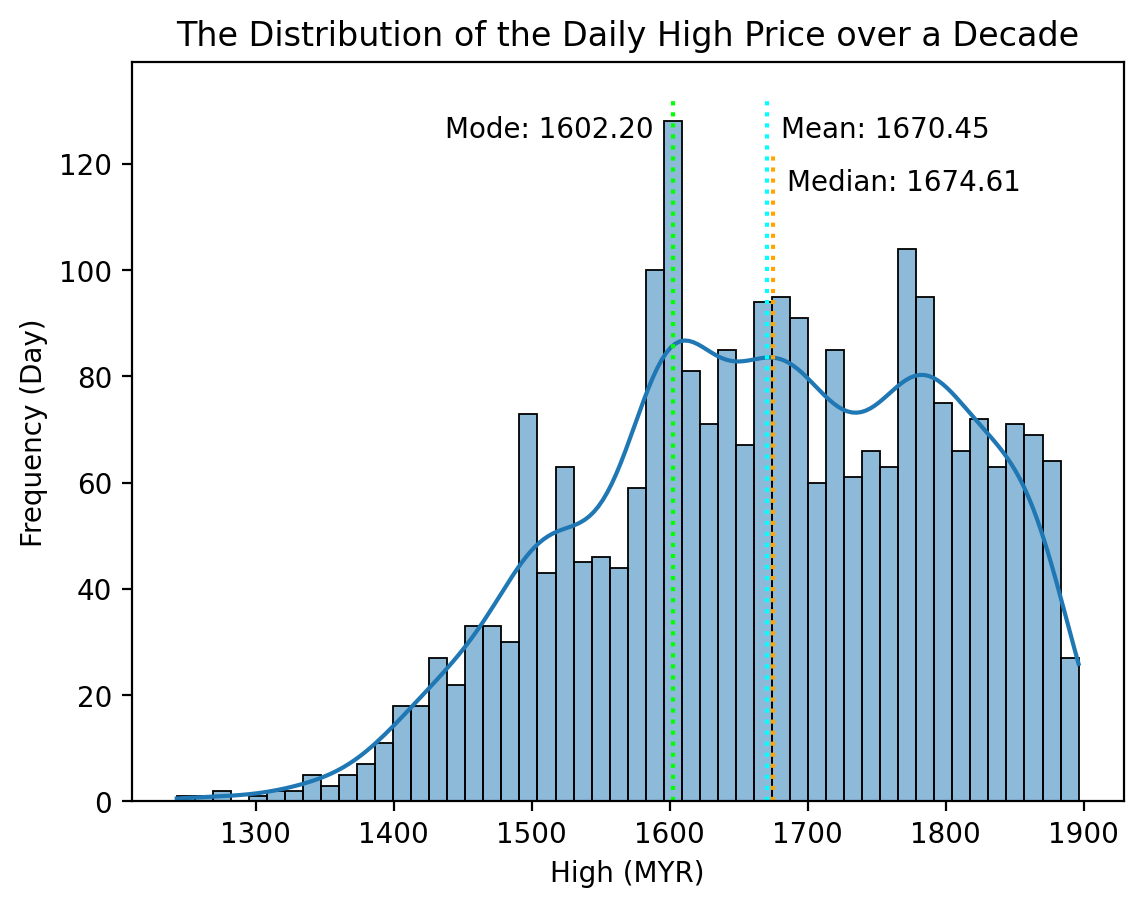

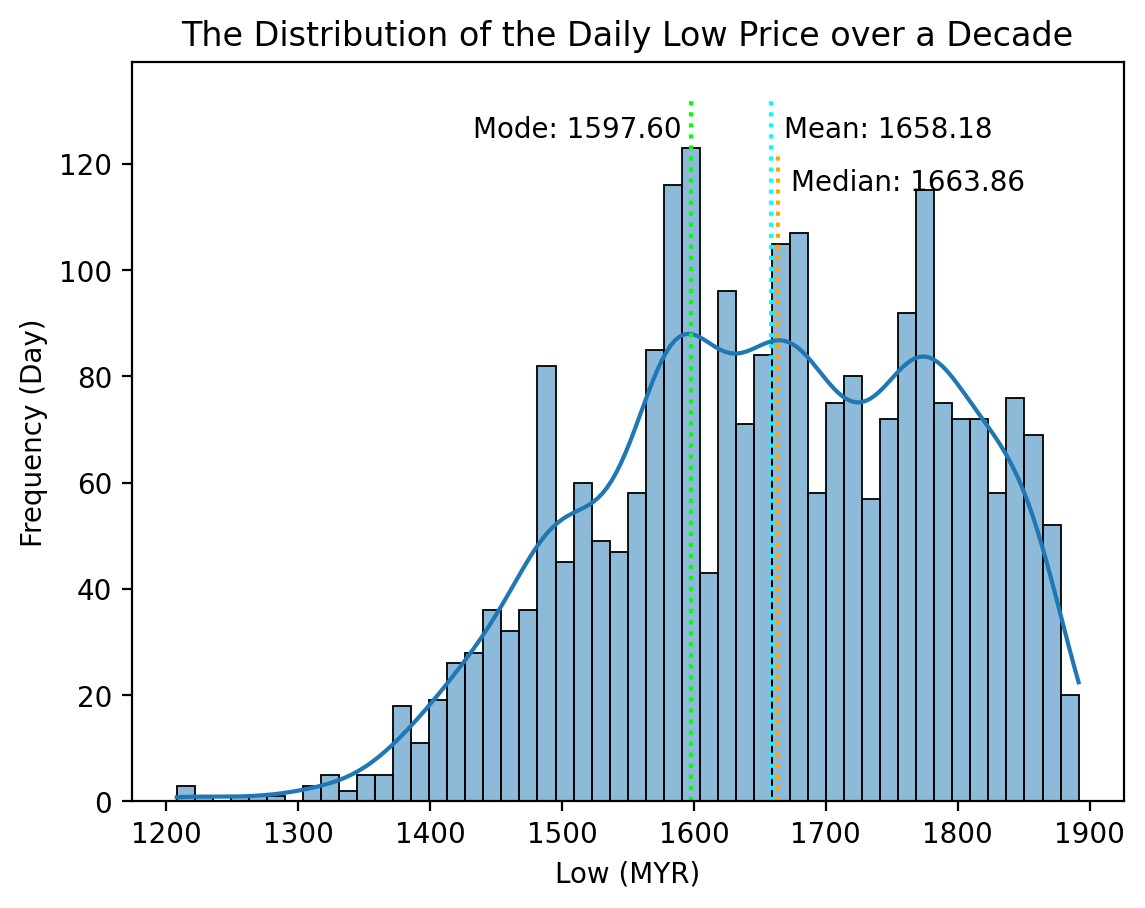

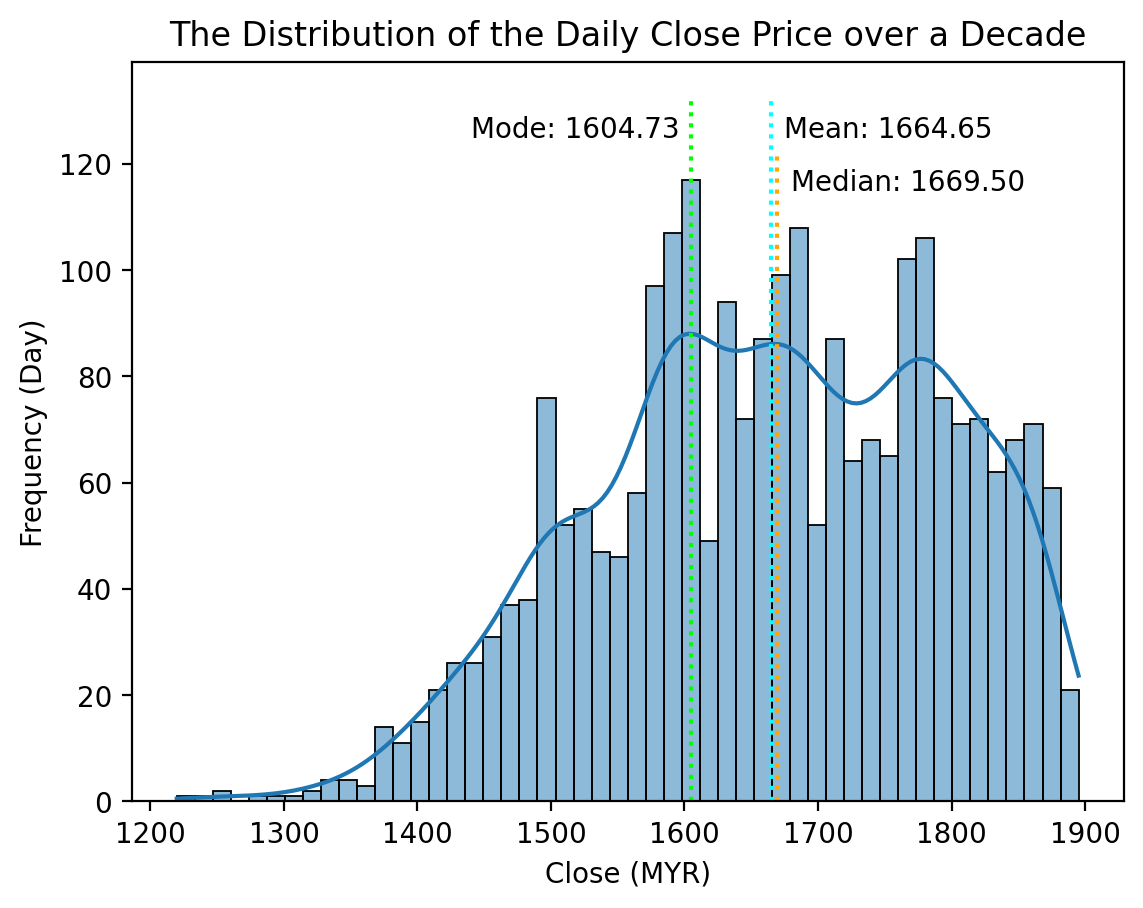

In [25]:
for x in ("Open", "High", "Low", "Close"):
    sns.histplot(df[x], bins=50, kde=True)
    plt.grid(False)

    hist = np.histogram(df[x], bins=50)

    mean = np.mean(df[x])
    mode = hist[1][np.argmax(hist[0])] + np.ptp(df[x]) / 50 / 2
    median = np.median(df[x])

    plt.text(mean + 10, 125, "Mean: %.2f" % mean)
    plt.text(mode - 165, 125, "Mode: %.2f" % mode)
    plt.text(median + 10, 115, "Median: %.2f" % median)

    plt.vlines(mean, ymin=0, ymax=132.5, colors="cyan", linestyles="dotted")
    plt.vlines(mode, ymin=0, ymax=132.5, colors="lime", linestyles="dotted")
    plt.vlines(median, ymin=0, ymax=122.5, colors="orange", linestyles="dotted")

    plt.title("The Distribution of the Daily %s Price over a Decade" % x)
    plt.xlabel("%s (MYR)" % x)
    plt.ylabel("Frequency (Day)")
    plt.show()

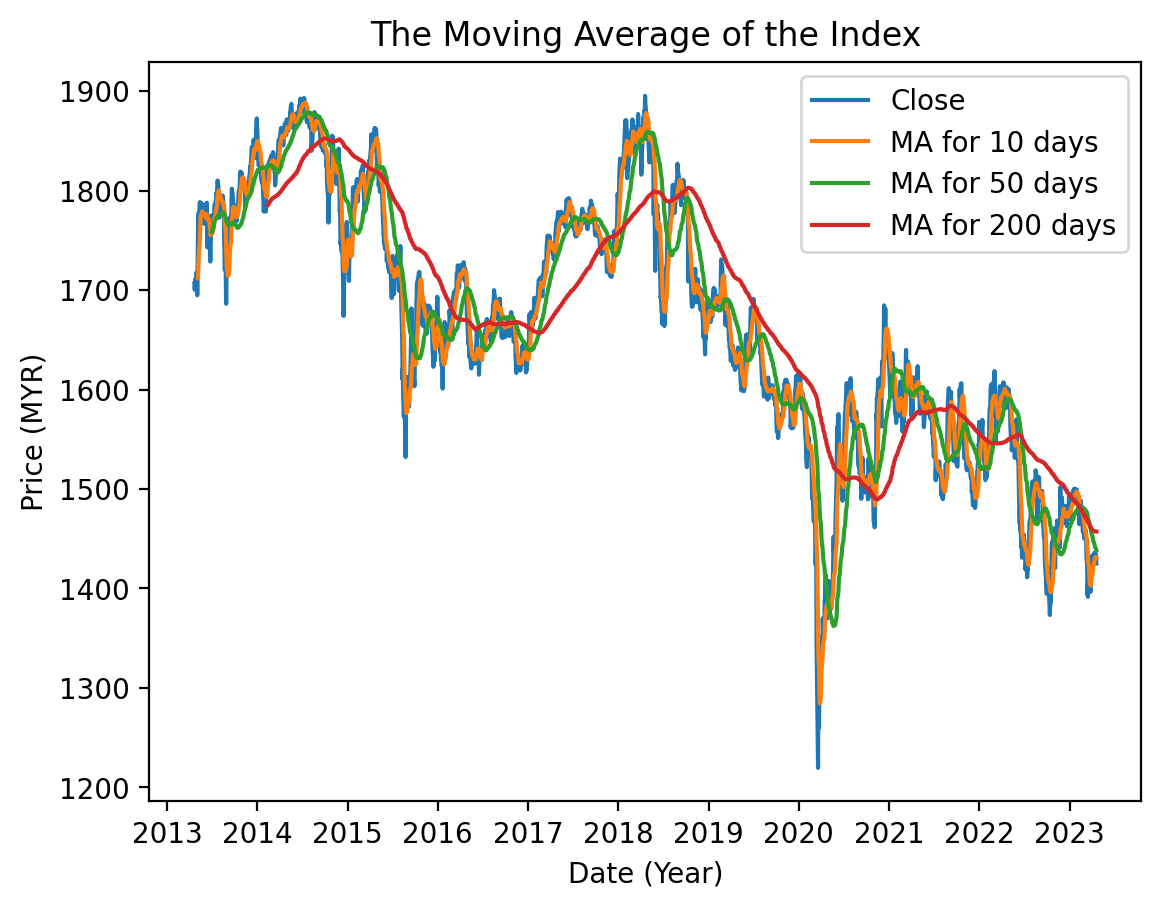

In [26]:
plt.plot(df.index, df["Close"])

days = (10, 50, 200)

for day in days:
    moving_avg = df["Close"].rolling(day).mean()
    plt.plot(df.index, moving_avg)

plt.title("The Moving Average of the Index")
plt.legend(["Close"] + ["MA for %d days" % day for day in days])
plt.xlabel("Date (Year)")
plt.ylabel("Price (MYR)")

plt.show()

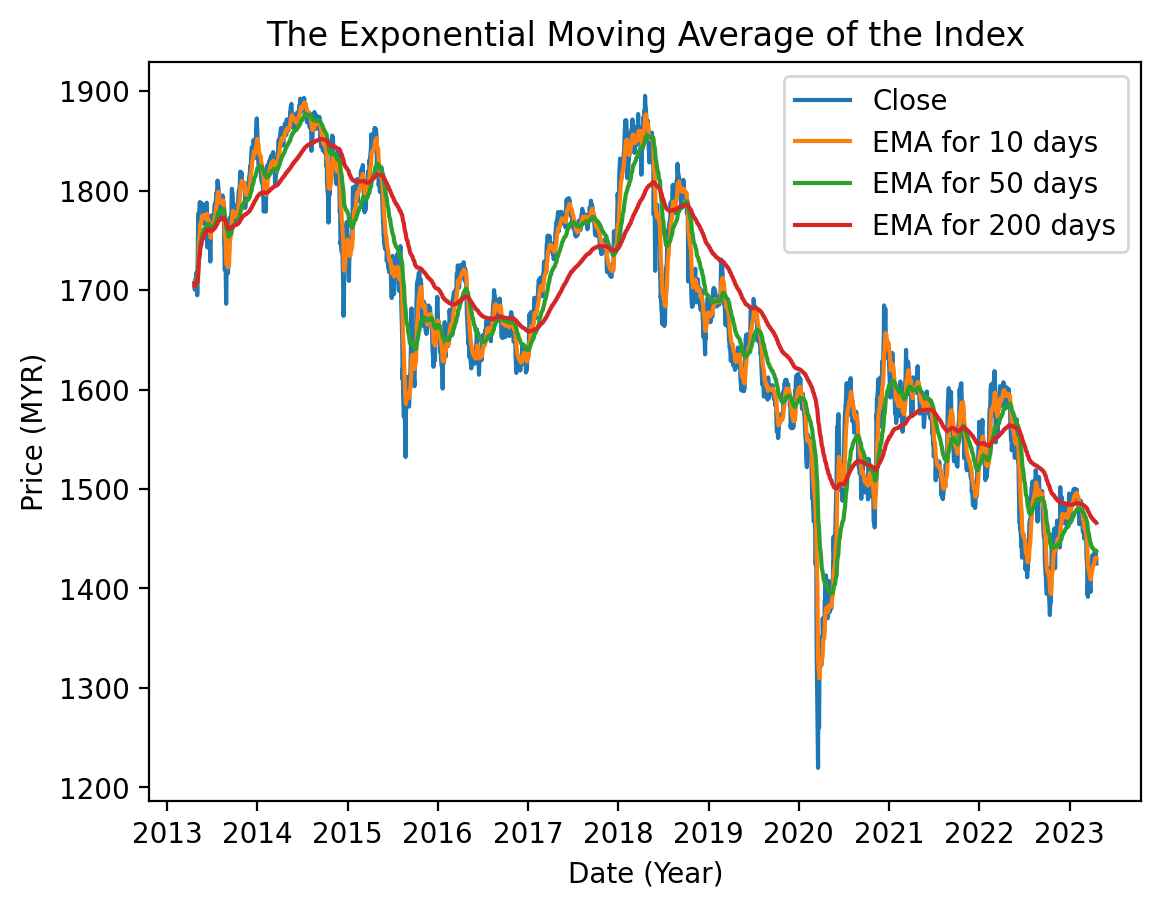

In [27]:
plt.plot(df.index, df["Close"])

days = (10, 50, 200)

for day in days:
    exp_moving_avg = df["Close"].ewm(span=day).mean()
    plt.plot(df.index, exp_moving_avg)

plt.title("The Exponential Moving Average of the Index")
plt.legend(["Close"] + ["EMA for %d days" % day for day in days])
plt.xlabel("Date (Year)")
plt.ylabel("Price (MYR)")

plt.show()

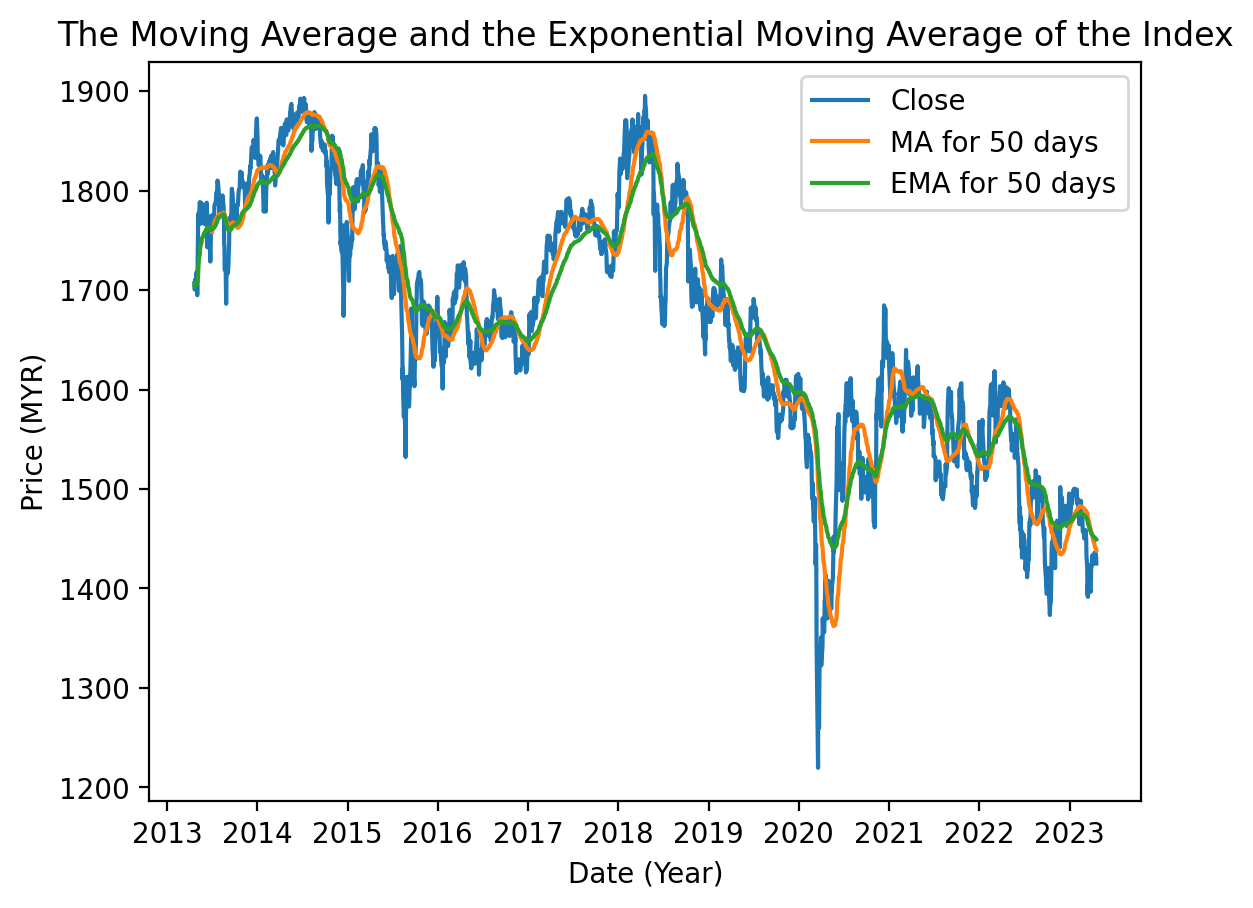

In [28]:
moving_avg = df["Close"].rolling(50).mean()
exp_moving_avg = df["Close"].ewm(50).mean()

plt.plot(df.index, df["Close"])
plt.plot(df.index, moving_avg)
plt.plot(df.index, exp_moving_avg)

plt.title("The Moving Average and the Exponential Moving Average of the Index")
plt.legend(["Close", "MA for 50 days", "EMA for 50 days"])
plt.xlabel("Date (Year)")
plt.ylabel("Price (MYR)")

plt.show()

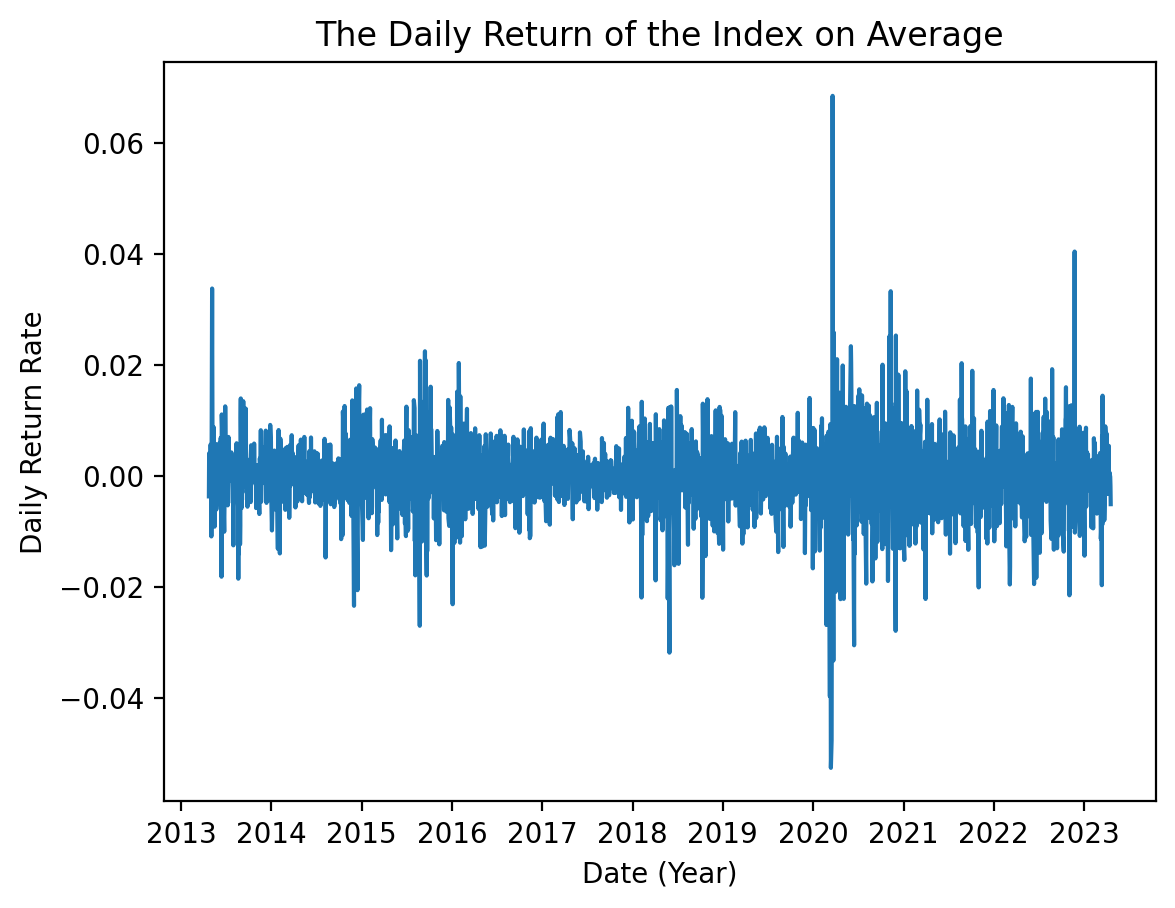

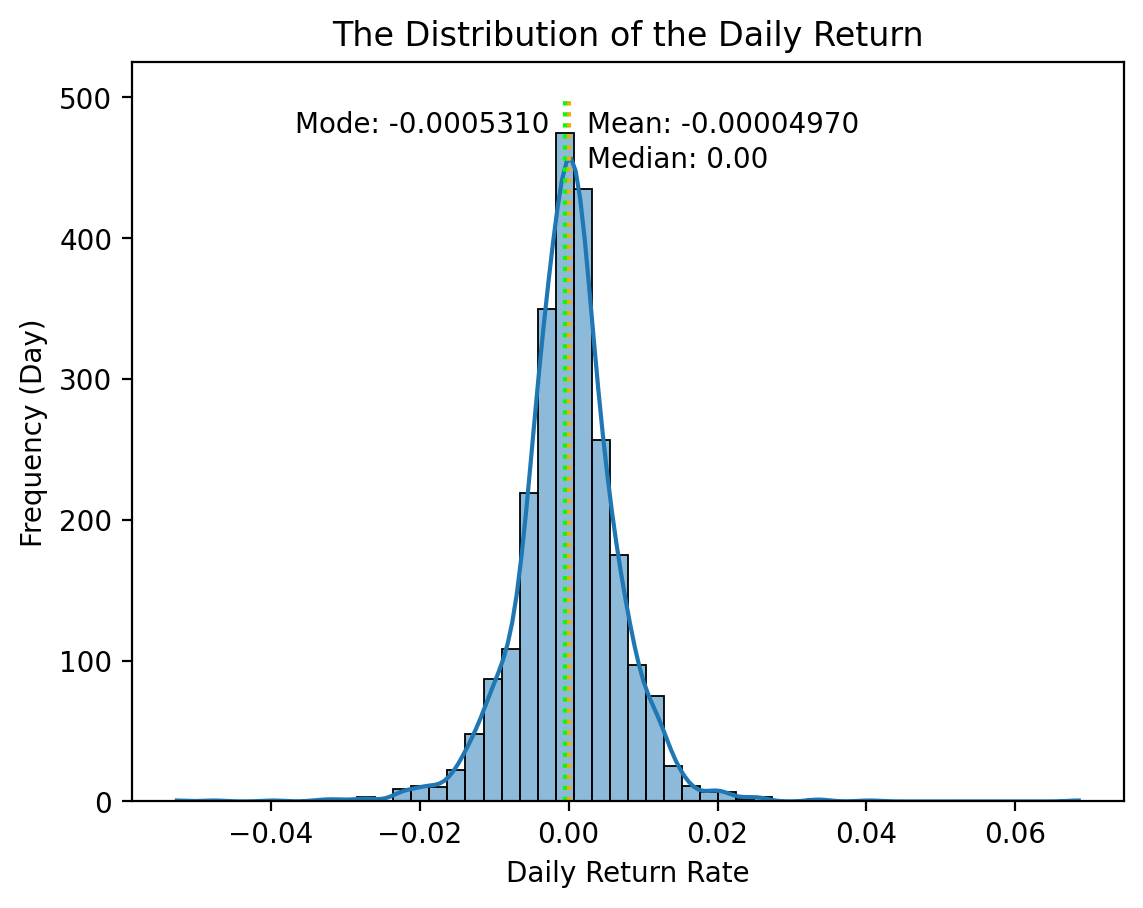

In [29]:
daily_return = df["Close"].pct_change()
daily_return_ = daily_return.dropna()

plt.plot(df.index, daily_return)

plt.title("The Daily Return of the Index on Average")
plt.xlabel("Date (Year)")
plt.ylabel("Daily Return Rate")

plt.show()

sns.histplot(daily_return_, bins=50, kde=True)

hist = np.histogram(daily_return_, bins=50)

mean = np.mean(daily_return_)
mode = hist[1][np.argmax(hist[0])] + np.ptp(daily_return_) / 50 / 2
median = np.median(daily_return_)

plt.text(mean + 0.0025, 475, "Mean: %.8f" % mean)
plt.text(mode - 0.03625, 475, "Mode: %.7f" % mode)
plt.text(median + 0.0025, 450, "Median: %.2f" % median)

plt.vlines(mean, ymin=0, ymax=500, colors="cyan", linestyles="dotted")
plt.vlines(mode, ymin=0, ymax=500, colors="lime", linestyles="dotted")
plt.vlines(median, ymin=0, ymax=500, colors="orange", linestyles="dotted")

plt.title("The Distribution of the Daily Return")
plt.xlabel("Daily Return Rate")
plt.ylabel("Frequency (Day)")

plt.show()

In [30]:
# page = requests.get(
#     "https://finance.yahoo.com/quote/%5EKLSE/components?p=%5EKLSE",
#     headers = {
#         'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
#     }
# )

In [31]:
# components = pd.read_html(page.text)[0]
# components.to_csv("klse_components.csv")

In [32]:
components = pd.read_csv("klse_components.csv", index_col=0)

In [33]:
components.head()

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,1015.KL,AMMB Holdings Bhd,3.66,0.00,0.00%,779500
1,1155.KL,Malayan Banking Bhd,8.70,0.01,+0.12%,1970400
2,5183.KL,Petronas Chemicals Group Bhd,7.20,-0.01,-0.14%,6265700
3,5285.KL,Sime Darby Plantation Bhd,4.31,0.01,+0.23%,650100
4,4707.KL,Nestle Malaysia Bhd,134.60,-0.40,-0.30%,58100


In [34]:
# for symbol in components["Symbol"]:
#     component = yf.Ticker(symbol)
#     hist = component.history(period="10y")
#     hist.to_csv("components/%s.csv" % symbol)

In [35]:
features = None

for idx, symbol in components.iterrows():
    symbol = components["Symbol"].iloc[idx]

    df_tmp = pd.read_csv("components/%s.csv" % symbol)
    df_tmp = df_tmp.drop(["Date", "Dividends", "Stock Splits"], axis=1)

    df_tmp_np = df_tmp.to_numpy()
    missing_rows = 2468 - df_tmp_np.shape[0]

    if missing_rows > 0:
        df_tmp_np = np.row_stack([df_tmp_np, np.zeros((missing_rows, 5))])

    df_tmp_np = df_tmp_np.reshape(-1)

    if features is None:
        features = np.array([df_tmp_np])
    else:
        features = np.concatenate((features, [df_tmp_np]), axis=0)

In [36]:
features.shape

(30, 12340)

In [37]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(features)

In [38]:
dbscan = DBSCAN(eps=1.25e8, min_samples=5)
dbscan.fit(pcs)
label = dbscan.fit_predict(pcs)

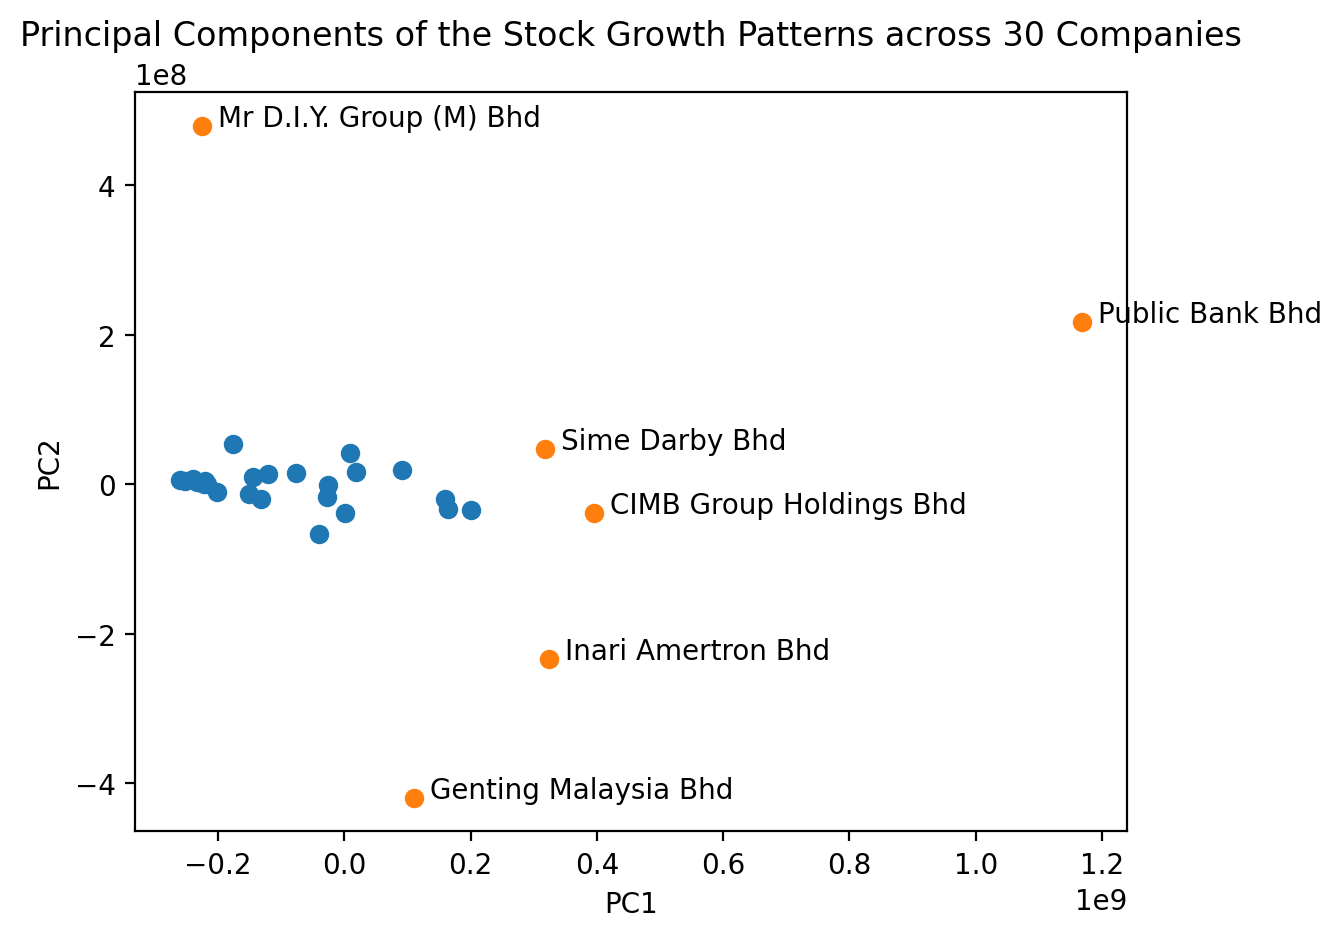

In [39]:
plt.scatter(pcs[label == 0, 0], pcs[label == 0, 1])
plt.scatter(pcs[label == -1, 0], pcs[label == -1, 1])

plt.title("Principal Components of the Stock Growth Patterns across 30 Companies")
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, name in enumerate(components["Company Name"]):
    if label[i] == 0:
        continue

    plt.annotate(name, (pcs[i, 0] + 0.025e9, pcs[i, 1]))

plt.show()

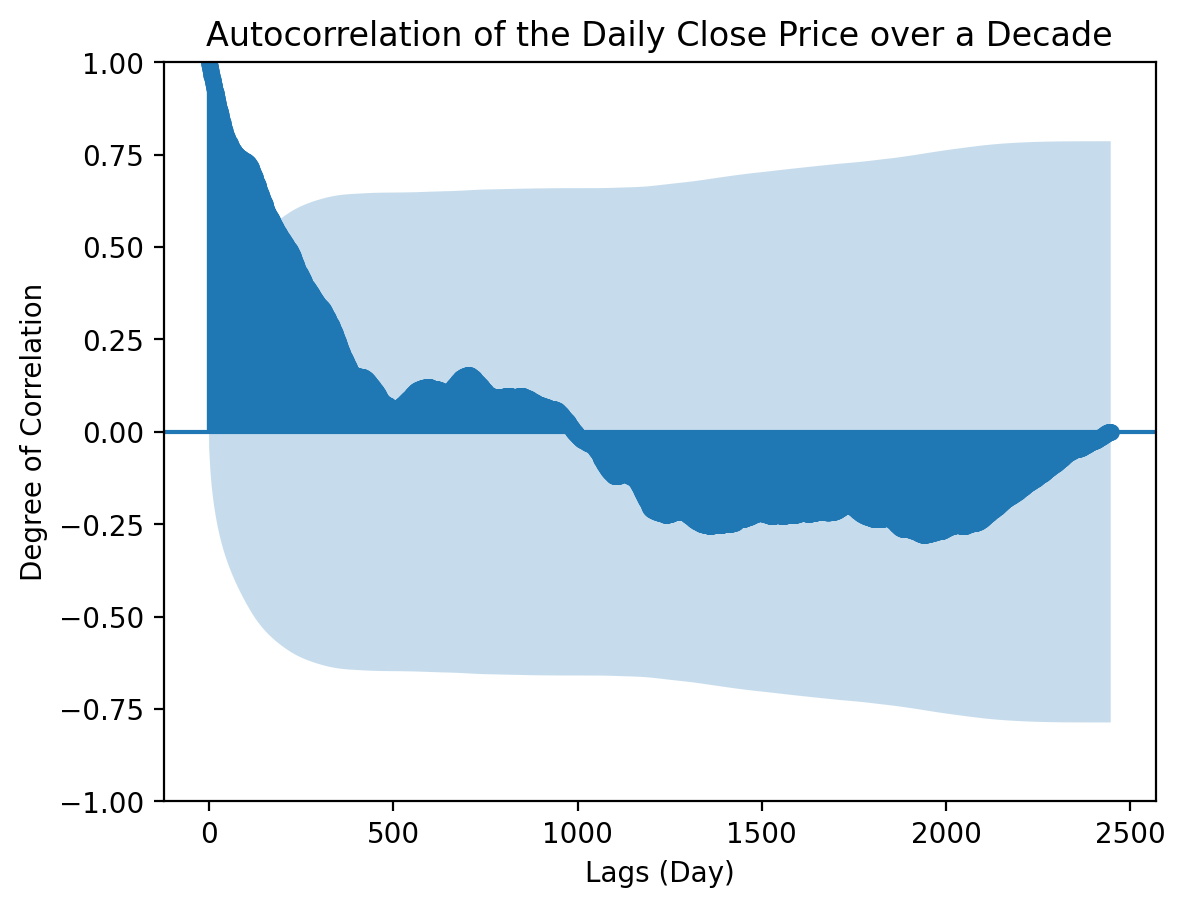

In [40]:
plot_acf(df["Close"], lags=len(df["Close"]) - 1, title="Autocorrelation of the Daily Close Price over a Decade")

plt.xlabel("Lags (Day)")
plt.ylabel("Degree of Correlation")
plt.show()

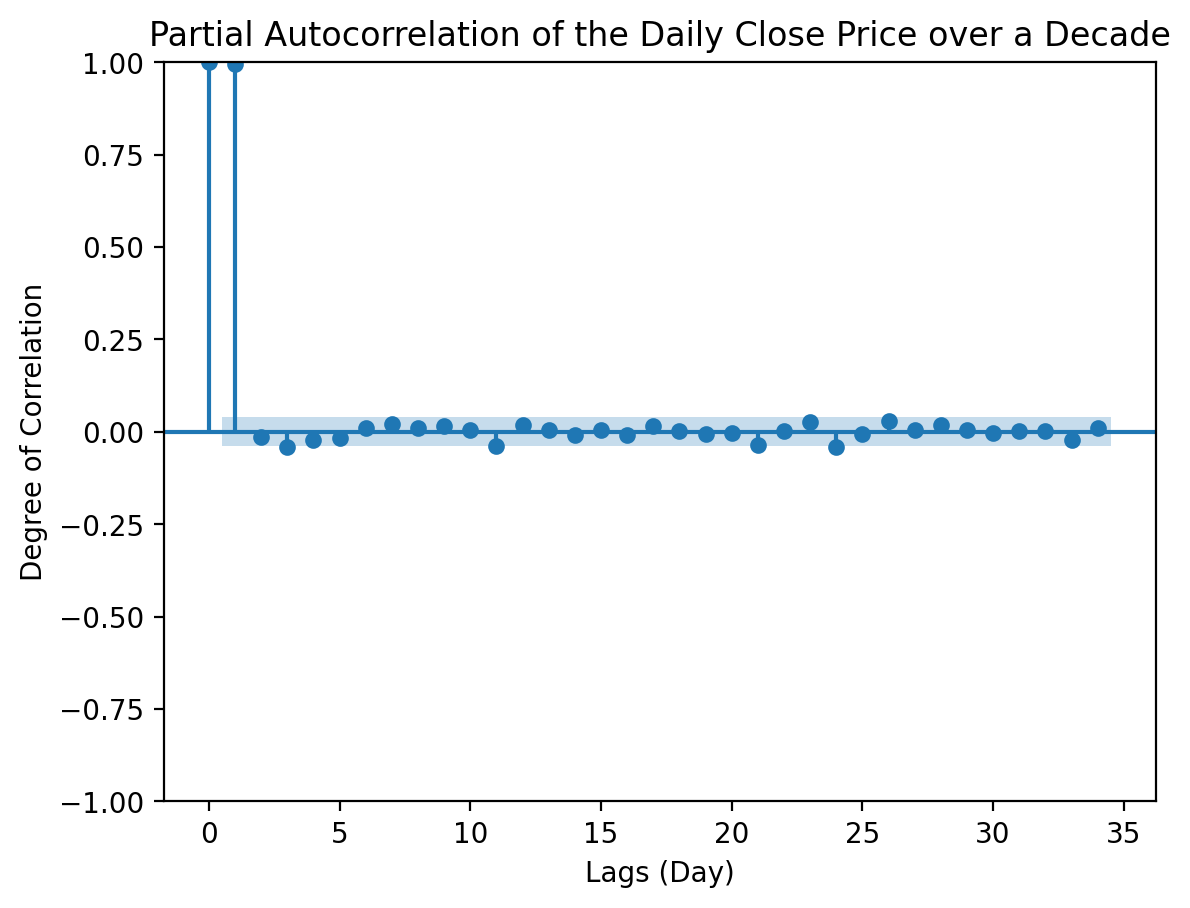

In [41]:
plot_pacf(df["Close"], method="ywm", title="Partial Autocorrelation of the Daily Close Price over a Decade")

plt.xlabel("Lags (Day)")
plt.ylabel("Degree of Correlation")
plt.show()